# Importes de librerias que necesitamos

In [4]:
#%pip install pandas
#%pip install numpy
#%pip install matplotlib
#%pip install seaborn
#%pip install scikit-learn
#%pip install missingno
#%pip install termcolor

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Matplotlib is building the font cache; this may take a moment.


# Análisis inicial, tratamiento de nulos y outliers

##### Cargamos un archivo CSV.

In [6]:
df = pd.read_csv("bmw_pricing_v3.csv")

##### Inspeccionamos la estructura del `DataFrame` con el metodo de pandas `info()`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

##### Identificamos valores `nulos` en cada columna / variable

In [8]:
df.isna().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

##### Mostramos las primeras filas para entender los datos con el metodo de pandas `head()` que nos muestra las primeras 5 lineas por defecto

In [9]:
df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


##### Tras un análisis de los datos en equipo, hemos decidido eliminar estas dos columnas

- **Marca**: Ya que todos los valores son `BMW`, por lo que no aporta ningun tipo de informacion interesante
- **asientos_traseros_plegables**: Hemos decidio que esta variable no es necesaria para el análisis además de tener un `70% de nulos`

##### Hacemos un array para aquellas columnas que queremos eliminar y con la ayuda de un `for` iteramos el array

In [10]:
del_cols = ["marca", "asientos_traseros_plegables"]

for col in del_cols:
    del df[col]

##### Realizamos otro `info()` para comprobar que las dos columnas se han eliminado

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4840 non-null   object 
 1   km                    4841 non-null   float64
 2   potencia              4842 non-null   float64
 3   fecha_registro        2420 non-null   object 
 4   tipo_gasolina         4838 non-null   object 
 5   color                 4398 non-null   object 
 6   tipo_coche            3383 non-null   object 
 7   volante_regulable     4839 non-null   object 
 8   aire_acondicionado    4357 non-null   object 
 9   camara_trasera        4841 non-null   object 
 10  elevalunas_electrico  4841 non-null   object 
 11  bluetooth             4115 non-null   object 
 12  gps                   4843 non-null   bool   
 13  alerta_lim_velocidad  4115 non-null   object 
 14  precio                4837 non-null   float64
 15  fecha_venta          

##### De nuevo, observamos donde seguimos teniendo `nulls`

In [12]:
df.isna().sum()

modelo                     3
km                         2
potencia                   1
fecha_registro          2423
tipo_gasolina              5
color                    445
tipo_coche              1460
volante_regulable          4
aire_acondicionado       486
camara_trasera             2
elevalunas_electrico       2
bluetooth                728
gps                        0
alerta_lim_velocidad     728
precio                     6
fecha_venta                1
dtype: int64

##### Usamos `isna().sum()` para calcular nulos por columna y visualizamos los resultados con un gráfico de barras `plot(kind="bar")`, facilitando la identificación de columnas con más nulos.

<Axes: >

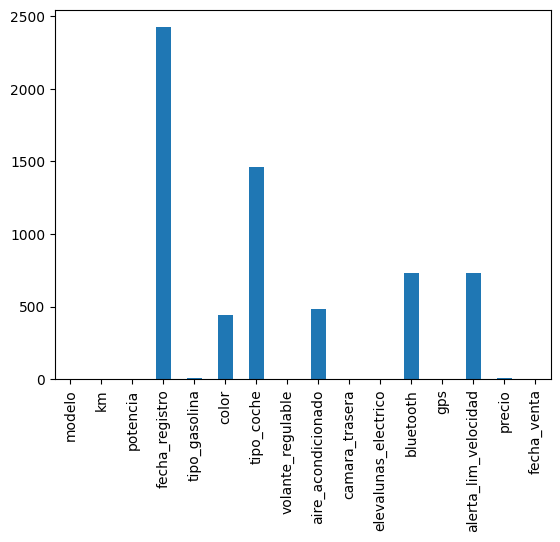

In [13]:
df.isna().sum().plot(kind="bar")

##### Después de observar los datos, vimos que habían columnas con 6 o menos `nulos`, por lo que en estos casos decidimos eliminar las filas donde estaban esos nulos.

##### Antes de eliminar algunas filas con nulos mostramos con la propiedad `shape` cuantas filas tenemos en total

In [14]:
print("Filas antes de la eliminacion:", df.shape[0])

Filas antes de la eliminacion: 4843


##### Creamos un array con las columnas con pocos nulos y aplicamos `dropna` con `inplace=True` para eliminar los nulos directamente en esas columnas.

In [15]:
columnas_pocos_nulos = ["modelo", "km", "potencia", "tipo_gasolina", "volante_regulable", "camara_trasera", "elevalunas_electrico", "precio", "fecha_venta"]
df.dropna(subset=columnas_pocos_nulos, inplace=True)

##### Usaremos `df.reset_index(drop=True)` para reasignar un índice consecutivo comenzando desde 0, eliminando el antiguo que ha quedado distosionado despues de eliminar registros donde habia nulos.
##### Esto simplifica la gestión y presentación del DataFrame al mantener un índice limpio y ordenado.

In [16]:
df.reset_index(drop=True, inplace=True)

##### Ahora, de nuevo, después de eliminar algunas filas con nulos, mostramos la cantidad de registros que tenemos


In [17]:
print("Filas despues de la eliminacion:", df.shape[0])

Filas despues de la eliminacion: 4817


##### Tras aplicar el cambio, solo se eliminaron 26 filas. Ahora debemos reanalizar los datos y decidir cómo manejar las columnas con muchos nulos.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4817 non-null   object 
 1   km                    4817 non-null   float64
 2   potencia              4817 non-null   float64
 3   fecha_registro        2408 non-null   object 
 4   tipo_gasolina         4817 non-null   object 
 5   color                 4375 non-null   object 
 6   tipo_coche            3368 non-null   object 
 7   volante_regulable     4817 non-null   object 
 8   aire_acondicionado    4335 non-null   object 
 9   camara_trasera        4817 non-null   object 
 10  elevalunas_electrico  4817 non-null   object 
 11  bluetooth             4092 non-null   object 
 12  gps                   4817 non-null   bool   
 13  alerta_lim_velocidad  4092 non-null   object 
 14  precio                4817 non-null   float64
 15  fecha_venta          

##### Algunas columnas `bool` se interpretaron como `object` por nulos, mientras que las `float` se revisaron para validar sus rangos.

In [19]:
df.describe()

,km,potencia,precio
count,4.817000e+03,4817.000000,4817.000000
mean,1.409353e+05,128.984845,15841.831015
std,6.024268e+04,39.004876,9223.064638
min,-6.400000e+01,0.000000,100.000000
25%,1.027580e+05,100.000000,10900.000000
50%,1.409910e+05,120.000000,14200.000000
75%,1.752350e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


##### Vemos que la columna `km` tiene como mínimo **-64km**, al no tener sentido ese dato procederemos a eliminar las filas que contengan un km inferior **0**.

In [20]:
df.drop(df[df["km"] < 0].index, inplace=True)
df.reset_index(drop=True, inplace=True)

df.describe()

,km,potencia,precio
count,4.816000e+03,4816.000000,4816.000000
mean,1.409645e+05,128.963870,15829.547342
std,6.021466e+04,38.981748,9184.530828
min,4.760000e+02,0.000000,100.000000
25%,1.028315e+05,100.000000,10875.000000
50%,1.410270e+05,120.000000,14200.000000
75%,1.752392e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


##### Es extraño que la potencia mínima sea **0**, por lo que ordenamos el `DataFrame` de forma ascendente por la columna de potencia para analizarlo.

In [21]:
df.sort_values("potencia",ascending=True)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3741,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,NaN,11700.0,2018-03-01
1902,i3,152470.0,25.0,NaN,hybrid_petrol,black,hatchback,False,True,False,False,False,True,True,15500.0,2018-03-01
1773,i3,152328.0,25.0,NaN,hybrid_petrol,black,NaN,False,True,False,False,False,True,NaN,20300.0,2018-04-01
2748,316,146951.0,66.0,1990-03-01,petrol,white,sedan,False,False,False,False,False,False,False,1300.0,2018-04-01
2367,318,170529.0,66.0,NaN,diesel,silver,hatchback,False,False,True,False,False,False,False,1000.0,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,M3,39250.0,317.0,2015-11-01,petrol,black,sedan,True,True,False,False,True,True,True,52400.0,2018-05-01
70,M4,69410.0,317.0,2015-02-01,petrol,white,NaN,True,True,False,False,True,True,True,53600.0,2018-03-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
3577,M5,150187.0,412.0,NaN,petrol,white,sedan,True,True,True,True,True,True,True,41600.0,2018-09-01


##### Podemos ver que el modelo `X1` es el unico coche con **0** de potencia, por lo que procedemos a mirar si tenemos más coches con modelo `X1` en nuestro dataframe, para ver su potencia.

In [22]:
df[df["modelo"] == "X1"]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3719,X1,54157.0,105.0,2013-05-01,diesel,white,suv,True,True,False,False,NaN,True,NaN,13100.0,2018-01-01
3720,X1,121114.0,135.0,2013-10-01,diesel,grey,suv,False,False,False,False,False,False,False,13100.0,2018-04-01
3722,X1,167417.0,105.0,NaN,diesel,white,suv,False,False,False,False,False,False,False,3600.0,2018-09-01
3723,X1,61354.0,105.0,NaN,diesel,blue,NaN,False,False,False,False,False,False,True,16900.0,2018-06-01
3724,X1,93308.0,135.0,NaN,diesel,white,suv,False,False,False,False,False,False,True,13900.0,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,X1,137550.0,100.0,NaN,diesel,silver,NaN,True,True,False,True,False,True,True,13900.0,2018-09-01
4753,X1,140161.0,105.0,NaN,diesel,black,suv,False,False,False,False,False,False,NaN,10700.0,2018-09-01
4755,X1,221585.0,105.0,2011-05-01,diesel,silver,suv,True,NaN,False,False,NaN,True,False,9400.0,2018-09-01
4759,X1,120600.0,85.0,2013-03-01,diesel,black,NaN,False,NaN,True,False,False,False,NaN,11100.0,2018-09-01


##### En los siguientes bloques de codigo realizamos un análisis más exhaustivo de la potencia del modelo `X1`

In [23]:
print("Media:", df[df["modelo"] == "X1"]["potencia"].mean())

Media: 109.95255474452554


In [24]:
print("Moda:", df[df["modelo"] == "X1"]["potencia"].mode()[0])

Moda: 105.0


In [25]:
df[df["modelo"] == "X1"]["potencia"].value_counts()

potencia
105.0    91
100.0    54
85.0     36
135.0    33
120.0    31
130.0    13
160.0     9
150.0     3
110.0     2
0.0       1
137.0     1
Name: count, dtype: int64

##### Podemos ver que la `media de potencia` para este modelo es `109.95`, mientras que `el valor que más aparece es 105`, al tener un valor similar, decidimos `cambiar el valor 0.0 por 105`

In [26]:
df.loc[df["potencia"] == 0.0, "potencia"] = 105.0

df.describe()

,km,potencia,precio
count,4.816000e+03,4816.000000,4816.000000
mean,1.409645e+05,128.985673,15829.547342
std,6.021466e+04,38.938944,9184.530828
min,4.760000e+02,25.000000,100.000000
25%,1.028315e+05,100.000000,10875.000000
50%,1.410270e+05,120.000000,14200.000000
75%,1.752392e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


##### Con las columnas numéricas ya corregidas, revisamos nuevamente cuáles aún tienen nulos.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4816 entries, 0 to 4815
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4816 non-null   object 
 1   km                    4816 non-null   float64
 2   potencia              4816 non-null   float64
 3   fecha_registro        2408 non-null   object 
 4   tipo_gasolina         4816 non-null   object 
 5   color                 4374 non-null   object 
 6   tipo_coche            3367 non-null   object 
 7   volante_regulable     4816 non-null   object 
 8   aire_acondicionado    4334 non-null   object 
 9   camara_trasera        4816 non-null   object 
 10  elevalunas_electrico  4816 non-null   object 
 11  bluetooth             4091 non-null   object 
 12  gps                   4816 non-null   bool   
 13  alerta_lim_velocidad  4091 non-null   object 
 14  precio                4816 non-null   float64
 15  fecha_venta          

##### Volvemos a ver cuantos nulos hay en cada columna

In [28]:
df.isna().sum()

modelo                     0
km                         0
potencia                   0
fecha_registro          2408
tipo_gasolina              0
color                    442
tipo_coche              1449
volante_regulable          0
aire_acondicionado       482
camara_trasera             0
elevalunas_electrico       0
bluetooth                725
gps                        0
alerta_lim_velocidad     725
precio                     0
fecha_venta                0
dtype: int64

##### Aquí vemos las columnas y sus nulos:
- color: 442
- tipo_coche: 1449
- aire_acondicionado: 482
- bluetooth: 725
- alerta_lim_velocidad: 725
- fecha_registro: 2408


##### Para eliminar los nulos de la columna `color` los rellenaremos con la moda de cada modelo.
##### Por ejemplo, si el modelo `X1` tiene como `moda` el `color verde`, los `nulls` de ese `modelo` de coche se completarán con `verde`.
##### Si todos los valores del modelo `X1` son `nulls`, entonces utilizaremos la `moda` de toda la `columna`.

In [29]:
df_check_null_color = df[["modelo", "color"]]
lista_modelos_sin_color = df_check_null_color[df_check_null_color["color"].isna()]["modelo"].value_counts().iloc[:].index.to_list()

for i in lista_modelos_sin_color:
    print(i, end=", ")

320, 318, 520, X3, 116, X1, 316, X5, 118, 525, 530, 318 Gran Turismo, X4, 120, 420, 518, 535, 320 Gran Turismo, X6, 530 Gran Turismo, 420 Gran Coupé, 114, M550, 640, 730, X6 M, 520 Gran Turismo, 330, X5 M, 218 Active Tourer, 218, 135, 740, 325 Gran Turismo, 640 Gran Coupé, 335 Gran Turismo, 435 Gran Coupé, 325, 335, 225 Active Tourer, 

In [30]:
for modelo in lista_modelos_sin_color:
    # Crear una máscara para filtrar por el modelo actual
    mask = (df["modelo"] == str(modelo))
    
    # Calcular la moda del color. Si todas las filas filtradas son NaN en color, 
    # usar la moda global, en caso contrario, usar la moda del subset filtrado.
    if df.loc[mask, "color"].isna().all():
        moda = df["color"].mode()[0]
    else:
        moda = df.loc[mask, "color"].mode()[0]
    
    # Reemplazar los valores NaN por la moda correspondiente
    df.loc[mask, "color"] = df.loc[mask, "color"].fillna(moda)

# Imprimir la cantidad de valores nulos después de la operación
print("NULOS:\n", df.isna().sum(), "\n")


NULOS:
 modelo                     0
km                         0
potencia                   0
fecha_registro          2408
tipo_gasolina              0
color                      0
tipo_coche              1449
volante_regulable          0
aire_acondicionado       482
camara_trasera             0
elevalunas_electrico       0
bluetooth                725
gps                        0
alerta_lim_velocidad     725
precio                     0
fecha_venta                0
dtype: int64 



##### Ahora solo nos quedan las siguientes columnas con nulos:
- tipo_coche
- aire_acondicionado
- bluetooth
- alerta_lim_velocidad
- fecha_registro

##### Ahora aplicaremos una lógica parecida con las columnas `tipo_coche`, `aire_acondicionado`, `bluetooth`

In [31]:
# Seleccionar las columnas "modelo" y "tipo_coche"
df_check_null_tipo_coche = df[["modelo", "tipo_coche"]]

# Identificar modelos sin tipo_coche
lista_modelos_sin_tipo_coche = (
    df_check_null_tipo_coche[df_check_null_tipo_coche["tipo_coche"].isna()]["modelo"]
    .value_counts()
    .index
    .to_list()
)

# Para cada modelo sin tipo_coche, imputar el valor faltante con la moda correspondiente
for modelo in lista_modelos_sin_tipo_coche:
    # Crear máscara para filtrar filas por el modelo actual
    mask = (df["modelo"] == str(modelo))
    
    # Determinar la moda del tipo_coche para ese modelo
    # Si todas las filas de ese modelo en tipo_coche son NaN, usar la moda global
    # De lo contrario, usar la moda del subset filtrado por ese modelo.
    if df.loc[mask, "tipo_coche"].isna().all():
        moda = df["tipo_coche"].mode()[0]
    else:
        moda = df.loc[mask, "tipo_coche"].mode()[0]
    
    # Rellenar los valores NaN con la moda encontrada
    df.loc[mask, "tipo_coche"] = df.loc[mask, "tipo_coche"].fillna(moda)

# Mostrar la cantidad de valores nulos después de la imputación
print("NULOS:\n", df.isna().sum(), "\n")


NULOS:
 modelo                     0
km                         0
potencia                   0
fecha_registro          2408
tipo_gasolina              0
color                      0
tipo_coche                 0
volante_regulable          0
aire_acondicionado       482
camara_trasera             0
elevalunas_electrico       0
bluetooth                725
gps                        0
alerta_lim_velocidad     725
precio                     0
fecha_venta                0
dtype: int64 



##### Al ver que se nos hacía repetitivo usar el código y quedaba muy engorroso, decidimos hacer una función para aplicar estos cambios.

In [32]:
def fill_nulls(df, target: str, is_bool=False):
    # Crear un DataFrame temporal con las columnas "modelo" y la columna objetivo
    df_check_null_tipo_coche = df[["modelo", target]]
    
    # Obtener la lista de modelos que tienen valores nulos en la columna objetivo
    lista_modelos_sin_tipo_coche = (
        df_check_null_tipo_coche[df_check_null_tipo_coche[target].isna()]["modelo"]
        .value_counts()
        .index
        .to_list()
    )

    # Para cada modelo que tenga valores NaN en 'target'
    for modelo in lista_modelos_sin_tipo_coche:
        # Crear una máscara para filtrar el DataFrame por el modelo actual
        mask = (df["modelo"] == str(modelo))
        
        # Determinar la moda para reemplazar los valores NaN
        if is_bool == False:
            # Si todas las filas para este modelo en la columna 'target' son NaN, usar la moda global
            # De lo contrario, usar la moda del subset para este modelo.
            if df.loc[mask, target].isna().all():
                moda = df[target].mode()[0]
            else:
                moda = df.loc[mask, target].mode()[0]
        else:
            # Si es un valor booleano, si todas las filas son NaN, usar False, 
            # de lo contrario, usar la moda del subset.
            if df.loc[mask, target].isna().all():
                moda = False
            else:
                moda = df.loc[mask, target].mode()[0]
        
        # Rellenar los valores NaN con la moda encontrada
        df.loc[mask, target] = df.loc[mask, target].fillna(moda)

    return df


##### Ahora vamos a convertir las columnas a tipo booleano antes de imputar

In [33]:
df["aire_acondicionado"] = df["aire_acondicionado"].astype(bool)

print("\033[1;4mPre-función (Aire Acondicionado):\033[0m")
print(df["aire_acondicionado"].value_counts(), "\n")

df = fill_nulls(df, "aire_acondicionado", is_bool=True)

print("\033[1;4mPost-función (Aire Acondicionado):\033[0m")
print(df["aire_acondicionado"].value_counts(), "\n")

df["bluetooth"] = df["bluetooth"].astype(bool)

print("\033[1;4mPre-función (Bluetooth):\033[0m")
print(df["bluetooth"].value_counts(), "\n")

df = fill_nulls(df, "bluetooth", is_bool=True)

print("\033[1;4mPost-función (Bluetooth):\033[0m")
print(df["bluetooth"].value_counts(), "\n")


Pre-función (Aire Acondicionado):
aire_acondicionado
True     3930
False     886
Name: count, dtype: int64 

Post-función (Aire Acondicionado):
aire_acondicionado
True     3930
False     886
Name: count, dtype: int64 

Pre-función (Bluetooth):
bluetooth
False    3100
True     1716
Name: count, dtype: int64 

Post-función (Bluetooth):
bluetooth
False    3100
True     1716
Name: count, dtype: int64 



##### Con estos prints podemos ver como evoluciona la cantidad de cada valor en las columnas antes y después de aplicar la función.

In [34]:
df.isna().sum()

modelo                     0
km                         0
potencia                   0
fecha_registro          2408
tipo_gasolina              0
color                      0
tipo_coche                 0
volante_regulable          0
aire_acondicionado         0
camara_trasera             0
elevalunas_electrico       0
bluetooth                  0
gps                        0
alerta_lim_velocidad     725
precio                     0
fecha_venta                0
dtype: int64

##### Ahora solo nos quedan las siguientes columnas con nulos:
- alerta_lim_velocidad
- fecha_registro

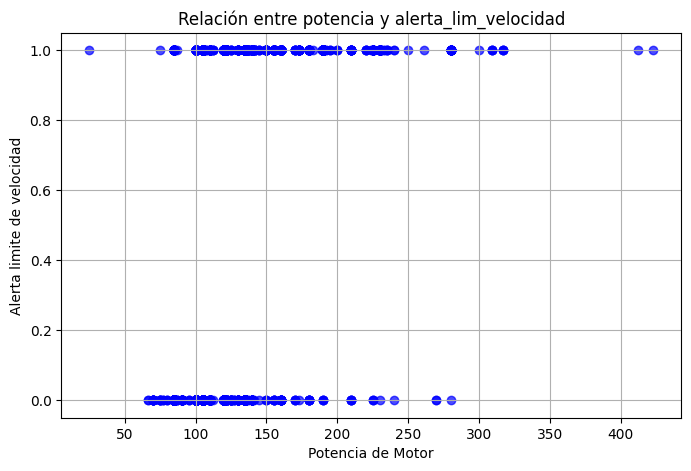

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(df['potencia'], df['alerta_lim_velocidad'], color='blue', alpha=0.7)
plt.title('Relación entre potencia y alerta_lim_velocidad')
plt.xlabel('Potencia de Motor')
plt.ylabel('Alerta limite de velocidad')
plt.grid(True)
plt.show()

##### Podemos ver que la columna `potencia tiene varios outliers`, ahora veremos cuantos valores se salen de los rangos "normales" (que parece ser entre 50 y 350).

In [36]:
print("Pre-borrado:", df.shape[0])
df.drop(df[(df["potencia"] < 50.0) | (df["potencia"] > 350.0)].index, axis=0, inplace=True)
print("Post-borrado:", df.shape[0])

Pre-borrado: 4816
Post-borrado: 4812


##### Ahora procedemos a ver la relacion que hay entre las columnas `potencia` y `alerta_lim_velocidad` con la ayuda de un grafico tipo `scatter`

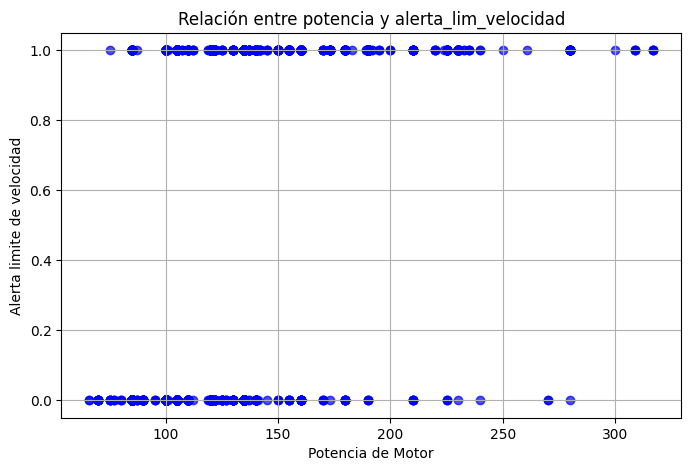

In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(df['potencia'], df['alerta_lim_velocidad'], color='blue', alpha=0.7)
plt.title('Relación entre potencia y alerta_lim_velocidad')
plt.xlabel('Potencia de Motor')
plt.ylabel('Alerta limite de velocidad')
plt.grid(True)
plt.show()

##### Podemos ver que no hay mucha relación entre `potencia` y la `alerta_lim_velocidad`, ya que podemos ver que:
- `False` se concentra en potencias **entre 50 y 200**
- Y el `True` **entre 100 y 350**.

In [38]:
print(df[(df["potencia"] < 50.0) | (df["potencia"] > 350.0)].shape[0])

print(df.shape[0])

0
4812


In [39]:
df_sup = df.copy()
df_sup.dropna(subset="alerta_lim_velocidad", inplace=True)
df_sup["alerta_lim_velocidad"] = df_sup["alerta_lim_velocidad"].astype("int64")
df_sup = pd.DataFrame(df_sup.groupby("modelo").agg({"alerta_lim_velocidad": "sum", "potencia": "mean"}))
df_sup.sort_values("potencia", ascending=False)

,alerta_lim_velocidad,potencia
modelo,,
M4,2,317.000000
M3,6,311.666667
M550,11,280.000000
750,1,280.000000
X5 M50,3,280.000000
...,...,...
216 Active Tourer,0,85.000000
216 Gran Tourer,0,85.000000
316,39,84.837563


##### No parece ser que este relacionado el `modelo` con la `potencia`, por lo que lo rellenare con la `moda` segun su `modelo` utilizando el metodo `fill_nulls()` creado anteriormente.

In [40]:
# Asegurar que la columna alerta_lim_velocidad sea booleana antes de la imputación (si no el Python nos devolvera muchos "Warnings")
df["alerta_lim_velocidad"] = df["alerta_lim_velocidad"].astype(bool)

# Ahora llamamos a la función
df = fill_nulls(df, "alerta_lim_velocidad", is_bool=True)

df.isna().sum()

modelo                     0
km                         0
potencia                   0
fecha_registro          2405
tipo_gasolina              0
color                      0
tipo_coche                 0
volante_regulable          0
aire_acondicionado         0
camara_trasera             0
elevalunas_electrico       0
bluetooth                  0
gps                        0
alerta_lim_velocidad       0
precio                     0
fecha_venta                0
dtype: int64

In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4812 entries, 0 to 4815
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4812 non-null   object 
 1   km                    4812 non-null   float64
 2   potencia              4812 non-null   float64
 3   fecha_registro        2407 non-null   object 
 4   tipo_gasolina         4812 non-null   object 
 5   color                 4812 non-null   object 
 6   tipo_coche            4812 non-null   object 
 7   volante_regulable     4812 non-null   object 
 8   aire_acondicionado    4812 non-null   bool   
 9   camara_trasera        4812 non-null   object 
 10  elevalunas_electrico  4812 non-null   object 
 11  bluetooth             4812 non-null   bool   
 12  gps                   4812 non-null   bool   
 13  alerta_lim_velocidad  4812 non-null   bool   
 14  precio                4812 non-null   float64
 15  fecha_venta           4812

In [42]:
df

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,hatchback,True,True,False,True,True,True,True,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,estate,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,coupe,True,True,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,van,False,True,False,False,False,True,False,14600.0,2018-08-01
4812,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,van,False,True,False,False,False,True,True,17500.0,2018-08-01
4813,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01
4814,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2018-09-01


##### Al ver que tenemos variables `bool` con tipo de `object`, procedemos a cambiarlos a `bool` y las columnas que contienen fechas a un tipo `date`

In [43]:
cols_to_bool = ["volante_regulable", "aire_acondicionado", 
"camara_trasera",  "elevalunas_electrico", 
"bluetooth", "gps", "alerta_lim_velocidad"]

df = df.astype({"volante_regulable": "bool",
            "aire_acondicionado": "bool", 
            "camara_trasera": "bool",  
            "elevalunas_electrico": "bool",
            "bluetooth": "bool", 
            "gps": "bool", 
            "alerta_lim_velocidad": "bool"})

for col in ["fecha_registro", "fecha_venta"]:
    df[col] = pd.to_datetime(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4812 entries, 0 to 4815
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4812 non-null   object        
 1   km                    4812 non-null   float64       
 2   potencia              4812 non-null   float64       
 3   fecha_registro        2407 non-null   datetime64[ns]
 4   tipo_gasolina         4812 non-null   object        
 5   color                 4812 non-null   object        
 6   tipo_coche            4812 non-null   object        
 7   volante_regulable     4812 non-null   bool          
 8   aire_acondicionado    4812 non-null   bool          
 9   camara_trasera        4812 non-null   bool          
 10  elevalunas_electrico  4812 non-null   bool          
 11  bluetooth             4812 non-null   bool          
 12  gps                   4812 non-null   bool          
 13  alerta_lim_velocidad  4

##### La única columna con nulos restante es `fecha_registro`. Dado que el equipo decidió conservarla para extraer el año y el mes, analizaremos cómo rellenar los nulos de manera adecuada.

In [44]:
df_sup = df.dropna()

print(df_sup.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2407 entries, 0 to 4814
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                2407 non-null   object        
 1   km                    2407 non-null   float64       
 2   potencia              2407 non-null   float64       
 3   fecha_registro        2407 non-null   datetime64[ns]
 4   tipo_gasolina         2407 non-null   object        
 5   color                 2407 non-null   object        
 6   tipo_coche            2407 non-null   object        
 7   volante_regulable     2407 non-null   bool          
 8   aire_acondicionado    2407 non-null   bool          
 9   camara_trasera        2407 non-null   bool          
 10  elevalunas_electrico  2407 non-null   bool          
 11  bluetooth             2407 non-null   bool          
 12  gps                   2407 non-null   bool          
 13  alerta_lim_velocidad  2

In [45]:
df_sup = df_sup.copy()
df_sup["tiempo"] = df_sup["fecha_venta"] - df_sup["fecha_registro"]

In [46]:
df_sup

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tiempo
0,118,140411.0,100.0,2012-02-01,diesel,black,hatchback,True,True,False,True,True,True,True,11300.0,2018-01-01,2161 days
2,320,183297.0,120.0,2012-04-01,diesel,white,estate,False,False,False,True,False,True,False,10200.0,2018-02-01,2132 days
5,335,152352.0,225.0,2011-05-01,petrol,black,coupe,True,True,False,True,True,True,True,17100.0,2018-02-01,2468 days
7,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,False,True,True,False,6100.0,2018-02-01,3106 days
12,420,132025.0,135.0,2014-03-01,diesel,blue,coupe,True,True,False,True,True,True,True,21700.0,2018-03-01,1461 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,216 Active Tourer,14533.0,85.0,2015-04-01,diesel,grey,van,True,True,True,False,False,True,False,16900.0,2018-07-01,1187 days
4809,218 Active Tourer,81230.0,100.0,2015-07-01,diesel,black,van,False,True,False,False,False,True,False,14200.0,2018-07-01,1096 days
4812,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,van,False,True,False,False,False,True,True,17500.0,2018-08-01,1157 days
4813,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01,1066 days


In [47]:
df_sup["tiempo"].max()

Timedelta('10258 days 00:00:00')

In [48]:
df_sup["tiempo"].min()

Timedelta('-2009 days +00:00:00')

In [49]:
df_sup.sort_values("tiempo", ascending=True)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tiempo
249,316,201102.0,85.0,2013-12-01,diesel,black,estate,True,True,False,False,False,True,False,8800.0,2008-06-01,-2009 days
97,320,342768.0,135.0,2011-12-01,diesel,black,estate,False,True,False,True,False,True,True,8200.0,2010-04-01,-609 days
3911,X5,706.0,155.0,2017-07-01,diesel,black,suv,True,True,False,True,True,True,True,41600.0,2018-02-01,215 days
136,330,122991.0,170.0,2017-11-01,diesel,green,coupe,True,True,True,True,False,True,False,11300.0,2018-08-01,273 days
3658,116,6777.0,85.0,2017-01-01,diesel,black,subcompact,False,True,False,False,False,True,True,11300.0,2018-03-01,424 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,525,230578.0,85.0,1997-07-01,diesel,black,sedan,False,True,False,False,False,True,True,200.0,2018-08-01,7701 days
3356,525,245302.0,105.0,1997-01-01,diesel,green,estate,False,True,False,False,False,True,True,900.0,2018-06-01,7821 days
25,318,196092.0,85.0,1995-10-01,petrol,black,convertible,True,False,False,False,False,False,False,1800.0,2018-05-01,8248 days
3038,318,98097.0,85.0,1994-01-01,petrol,blue,sedan,True,False,False,False,False,True,True,400.0,2018-04-01,8856 days


In [50]:
df.drop(df_sup[df_sup["tiempo"] < pd.Timedelta(0, unit="d")].index, inplace=True) #97 y 249
df

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,hatchback,True,True,False,True,True,True,True,11300.0,2018-01-01
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,estate,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,2018-02-01
4,425,97097.0,160.0,NaT,diesel,silver,coupe,True,True,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,218 Gran Tourer,39743.0,110.0,NaT,diesel,black,van,False,True,False,False,False,True,False,14600.0,2018-08-01
4812,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,van,False,True,False,False,False,True,True,17500.0,2018-08-01
4813,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01
4814,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2018-09-01


In [51]:
df = fill_nulls(df, "fecha_registro")

##### Concluimos que podemos eliminar las columnas `fecha_venta` y `fecha_registro` creando una nueva columna que calcule la antigüedad o el `tiempo` del coche desde su registro hasta su venta.

In [52]:

df["tiempo"] = df["fecha_venta"] - df["fecha_registro"]

df.isna().sum()

modelo                  0
km                      0
potencia                0
fecha_registro          0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             0
tiempo                  0
dtype: int64

In [53]:
df[df["tiempo"] < pd.Timedelta(0, unit="d")]
df.drop(df[df["tiempo"] < pd.Timedelta(0, unit="d")].index, inplace=True) #42, 175

In [54]:
del df["fecha_venta"]
del df ["fecha_registro"]

df["tiempo"] = df["tiempo"].dt.days.astype('int16')

# Tratamiento de duplicados

In [55]:
# Eliminar filas duplicadas del DataFrame 'df'.
# 'inplace=True' modifica el DataFrame original en lugar de crear una copia.
# 'ignore_index=True' vuelve a reindexar el DataFrame resultado tras la eliminación.
df.drop_duplicates(inplace=True, ignore_index=True)

# Reiniciar el índice del DataFrame 'df'.
# 'drop=True' indica que no se cree una columna adicional con el antiguo índice.
df.reset_index(drop=True, inplace=True)

# Visualizar el DataFrame resultante después de las operaciones.
df


,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo
0,118,140411.0,100.0,diesel,black,hatchback,True,True,False,True,True,True,True,11300.0,2161
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,1096
2,320,183297.0,120.0,diesel,white,estate,False,False,False,True,False,True,False,10200.0,2132
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,1402
4,425,97097.0,160.0,diesel,silver,coupe,True,True,False,False,True,True,True,33400.0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,218 Gran Tourer,39743.0,110.0,diesel,black,van,False,True,False,False,False,True,False,14600.0,1035
4804,218 Active Tourer,49832.0,100.0,diesel,grey,van,False,True,False,False,False,True,True,17500.0,1157
4805,218 Gran Tourer,19633.0,110.0,diesel,grey,van,False,True,False,False,False,True,True,17000.0,1066
4806,218 Active Tourer,27920.0,110.0,diesel,brown,van,True,True,False,False,False,True,True,22700.0,883


##### Hacemos finalmente otra revision para ver si tenemos algun nulo.

In [56]:
df.isna().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
tiempo                  0
dtype: int64

Como podemos ver ya no tenemos nulos en ninugna columna

# Análisis de correlación inicial

In [57]:
#corr = df.corr(numeric_only = True) 
#corr.style.background_gradient(cmap='coolwarm')

# Análisis de todas las variables vs target
Tambien, durante los siguientes analisis graficos, va a ser mas evidente la identificacion de `outliers`

### Km vs precio

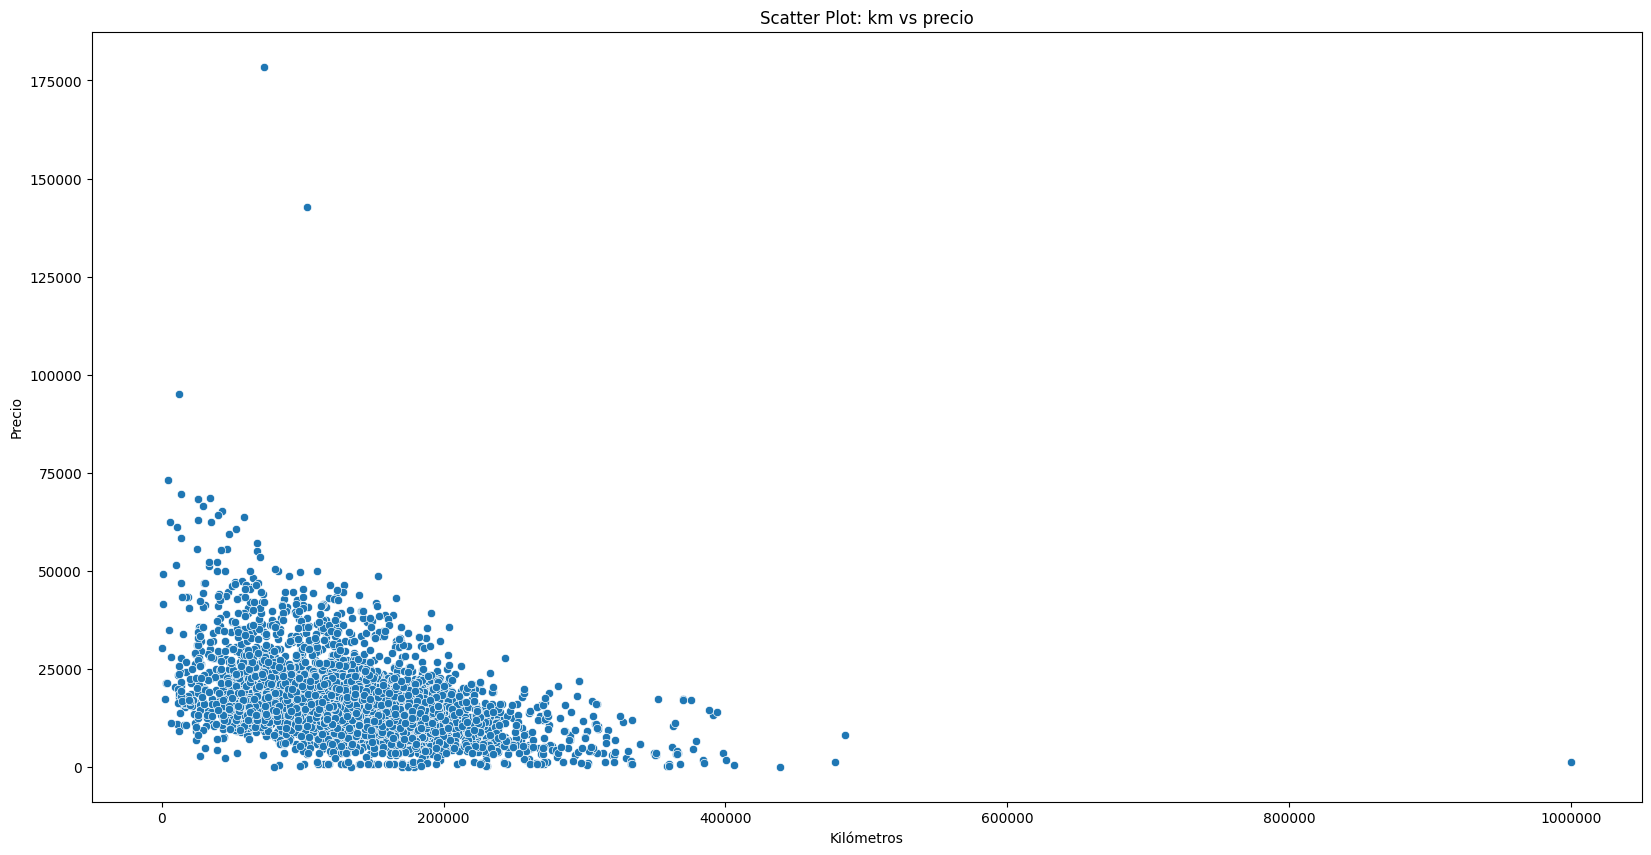

In [58]:
plt.figure(figsize=(20, 10)) 
sns.scatterplot(x='km', y='precio', data=df)
plt.ticklabel_format(style='plain', axis='x')  # Desactivar la notación científica en el eje x
plt.title('Scatter Plot: km vs precio')
plt.xlabel('Kilómetros')
plt.ylabel('Precio')
plt.show()

Imprimimos los valores minimos y maximos en la columna `km`

In [59]:
print('Valor mínimo de columna km:', df['km'].min())
print('Valor máximo de columna km:', df['km'].max())

Valor mínimo de columna km: 476.0
Valor máximo de columna km: 1000376.0


##### Tras hacer el scatterplot podemos identificar algunos outliers en la columna de `km` que se nos han escapado en analisis anteriores. La mayoria de estos valores se encuentran entre 150000 y 200000

Calculamos percentiles de la columna `km` para elegir el umbral
###### Un `percentil` es una medida estadística que indica el valor por debajo del cual se encuentra un porcentaje determinado de los datos en un conjunto. En otras palabras, divide los datos ordenados en 100 partes iguales, y cada percentil representa el valor que corresponde a un porcentaje acumulado.

In [60]:
df['km'].quantile([0.95, 0.99, 0.999, 0.9999])

0.9500    233549.8500
0.9900    320573.0900
0.9990    401650.2660
0.9999    752449.6873
Name: km, dtype: float64

El umbral que mas nos conviene es el percentil `0.9999` para aquellos valores atípicos en `km`. 

In [61]:
umbral_km = df['km'].quantile(0.9999)

##### Aplicamos la transformación logarítmica a los valores atípicos de 'km'

In [62]:
df['km'] = np.where(df['km'] > umbral_km, np.log1p(df['km']), df['km'])

##### Volvemos a mostrar el scatterplot para ver que no tenemos outliers en la columna de `km`

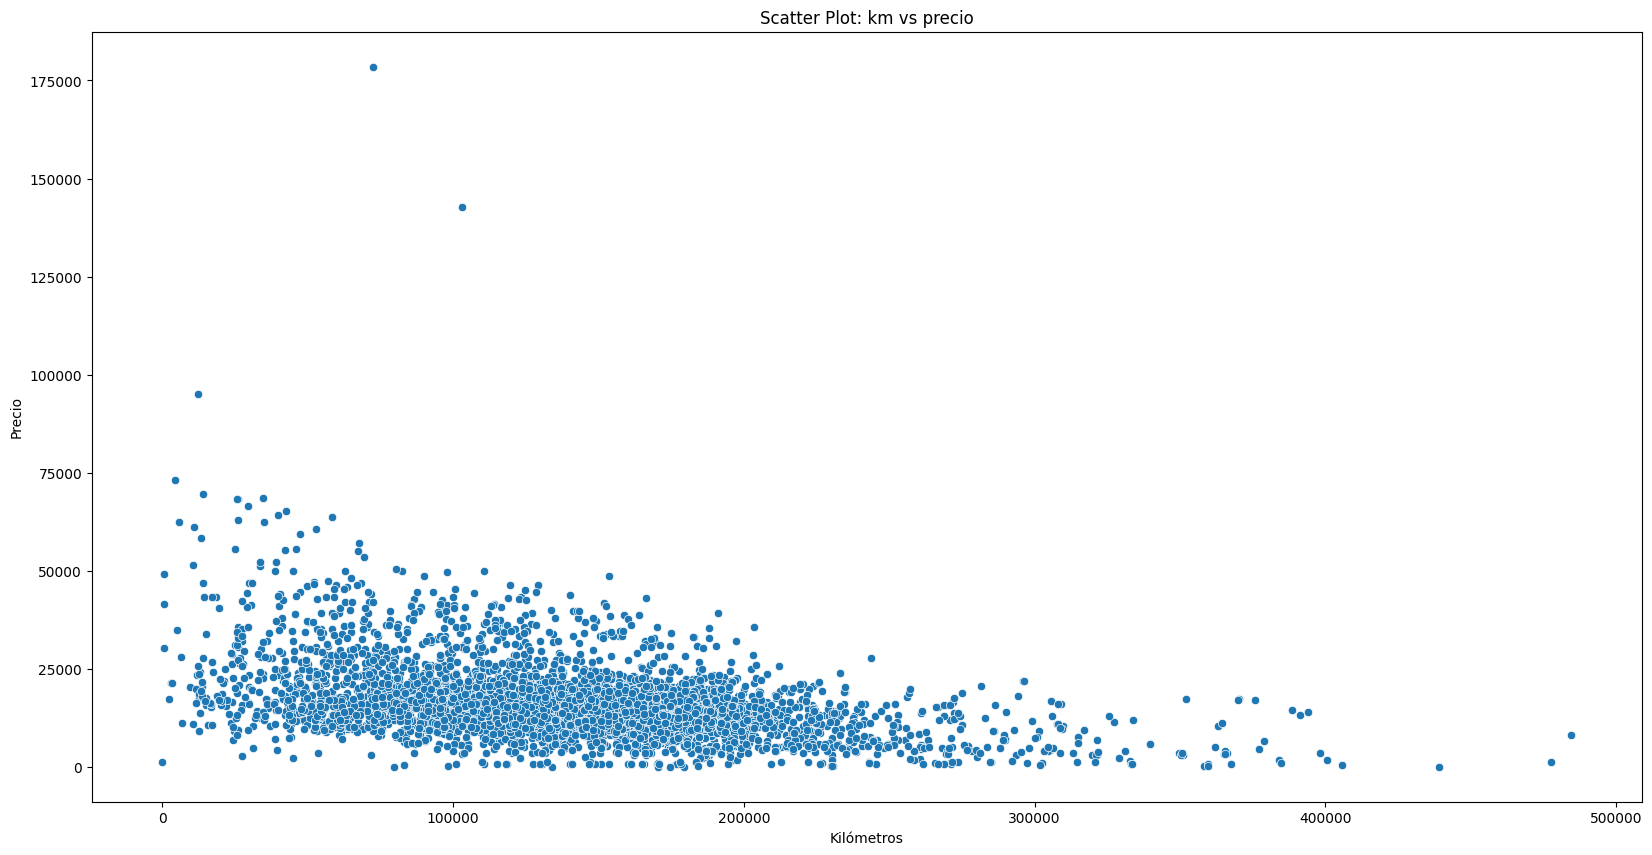

In [63]:
plt.figure(figsize=(20, 10)) 
sns.scatterplot(x='km', y='precio', data=df)
plt.ticklabel_format(style='plain', axis='x')  # Desactivar la notación científica en el eje x
plt.title('Scatter Plot: km vs precio')
plt.xlabel('Kilómetros')
plt.ylabel('Precio')
plt.show()

### Potencia vs precio

Valor mínimo de columna potencia: 66.0
Valor máximo de columna potencia: 317.0


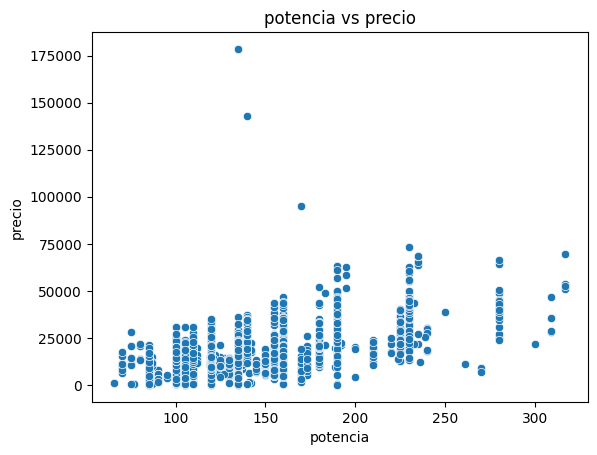

In [64]:
print('Valor mínimo de columna potencia:', df['potencia'].min())
print('Valor máximo de columna potencia:', df['potencia'].max())

sns.scatterplot(x='potencia', y='precio', data=df)
plt.title('potencia vs precio')
plt.show()

### Tiempo vs precio

In [65]:
print('Valor mínimo de columna tiempo:', df['tiempo'].min())
print('Valor máximo de columna tiempo:', df['tiempo'].max())

Valor mínimo de columna tiempo: 215
Valor máximo de columna tiempo: 10258


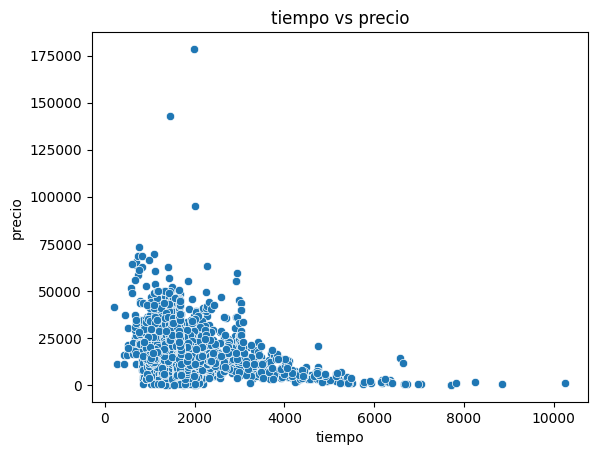

In [66]:
sns.scatterplot(x='tiempo', y='precio', data=df)
plt.title('tiempo vs precio')
plt.show()

### Modelo vs precio
Tras algunas pruebas, hemos visto que tenemos muchos valores unicos y en un solo `scatterplot` no se ve demasiado bien.

In [67]:
df['modelo'].nunique()

75

#### Ya que hay 75 valores unicos, vamos a dividir este analisis de los modelos de los coches en dos grupos divididos por la mitad.

In [68]:
modelos_unicos = df['modelo'].unique()
mitad = len(modelos_unicos) // 2
modelos_grupo_1 = modelos_unicos[:mitad]
modelos_grupo_2 = modelos_unicos[mitad:]

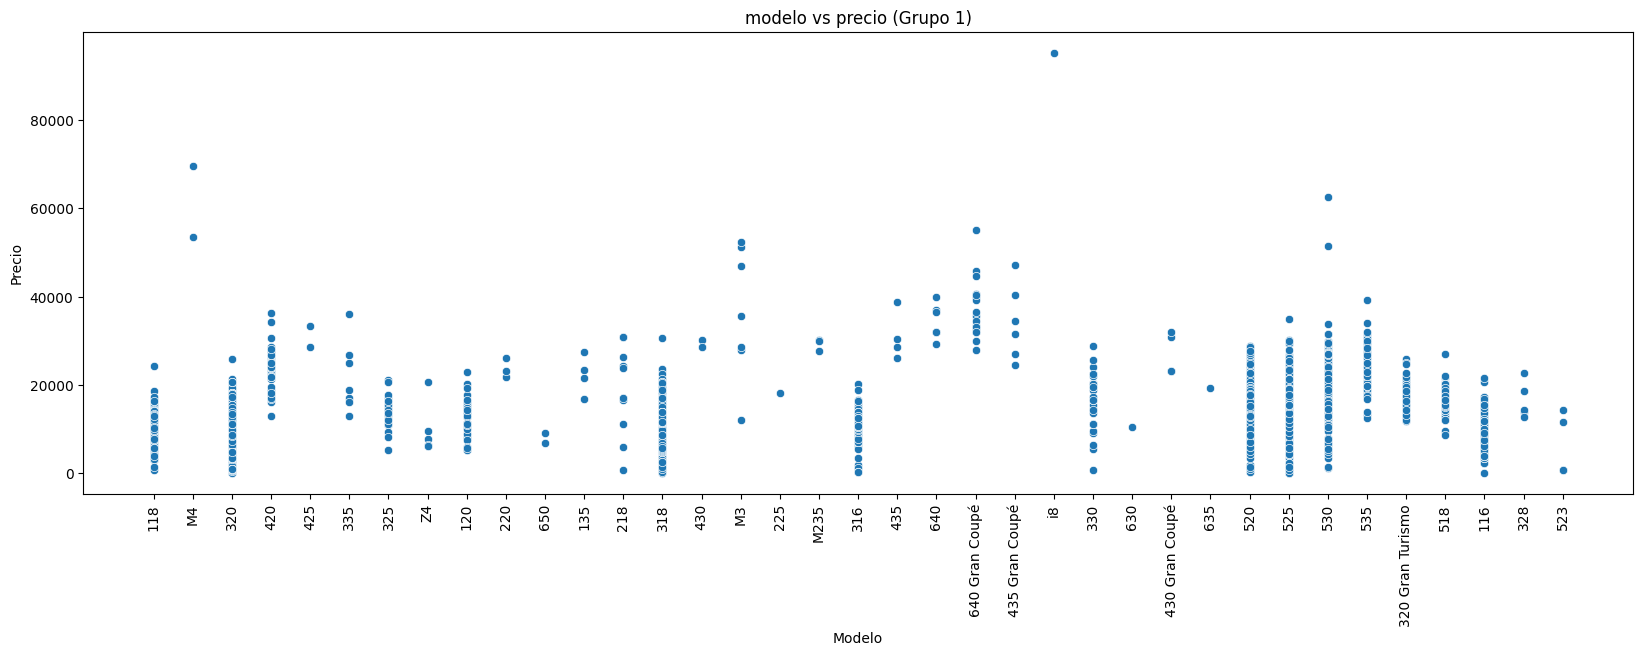

In [69]:
# modelo vs precio (Grupo 1)
plt.figure(figsize=(20, 6))
sns.scatterplot(x='modelo', y='precio', data=df[df['modelo'].isin(modelos_grupo_1)])
plt.title('modelo vs precio (Grupo 1)')
plt.xticks(rotation=90)
plt.xlabel('Modelo')
plt.ylabel('Precio')
plt.show()

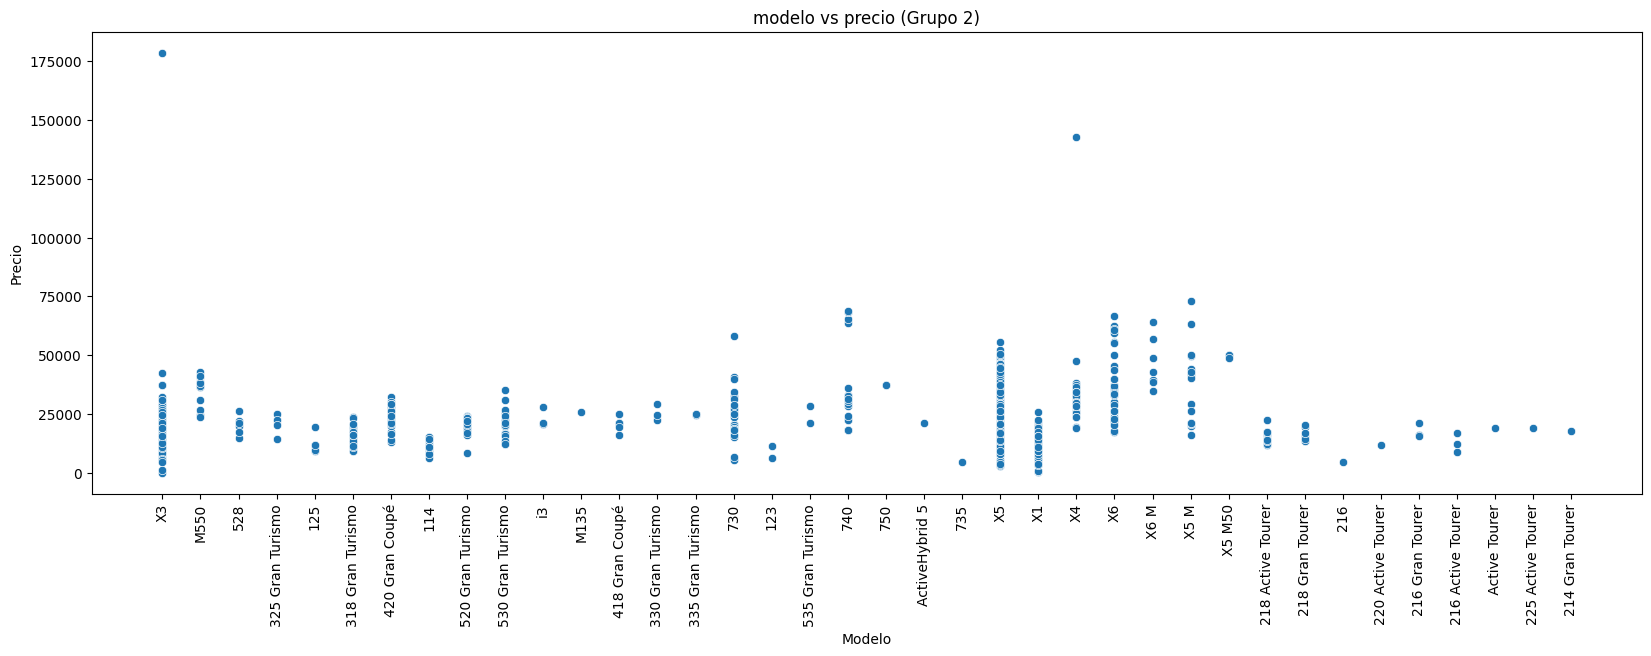

In [70]:
# modelo vs precio (Grupo 2)
plt.figure(figsize=(20, 6))
sns.scatterplot(x='modelo', y='precio', data=df[df['modelo'].isin(modelos_grupo_2)])
plt.title('modelo vs precio (Grupo 2)')
plt.xticks(rotation=90)
plt.xlabel('Modelo')
plt.ylabel('Precio')
plt.show()

##### Gracias al `scatterplot` de los `modelos` de coche contra el `target` (precio) podemos ver algunos outliers. 
No tiene sentido que la gran mayoria de `modelos` que son `X3` esten por debajo de **50000**, por lo tanto vamos a eliminar aquellos modelos `X3` por encima de **50000**. Tambien haremos lo mismo con el modelo `X4`.

In [71]:
df = df[~((df['modelo'] == 'X3') & (df['precio'] > 50000))]
df = df[~((df['modelo'] == 'X4') & (df['precio'] > 50000))]

##### Volvemos a mostrar el grupo 2 para ver que ese `outlier` ya no esta

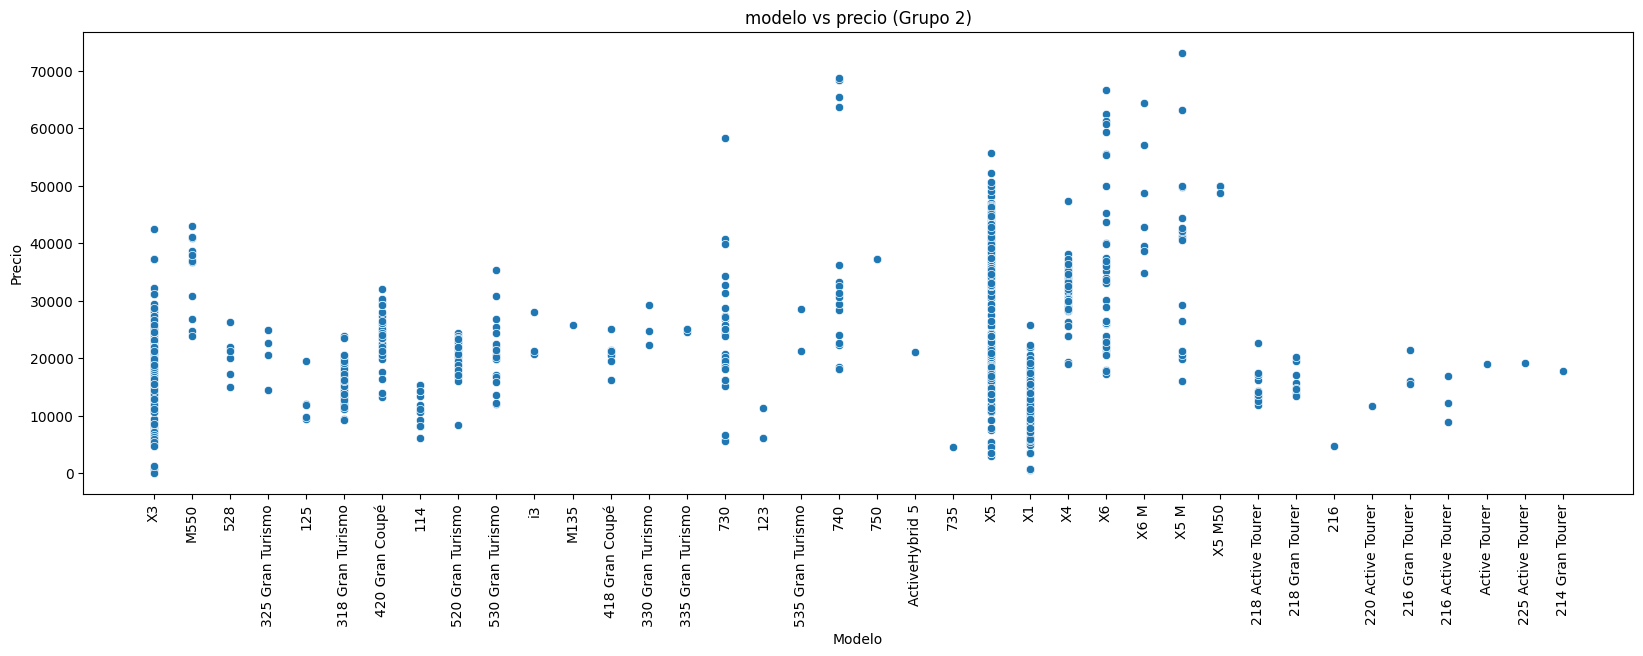

In [72]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='modelo', y='precio', data=df[df['modelo'].isin(modelos_grupo_2)])
plt.title('modelo vs precio (Grupo 2)')
plt.xticks(rotation=90)
plt.xlabel('Modelo')
plt.ylabel('Precio')
plt.show()

### Tipo de gasolina vs precio

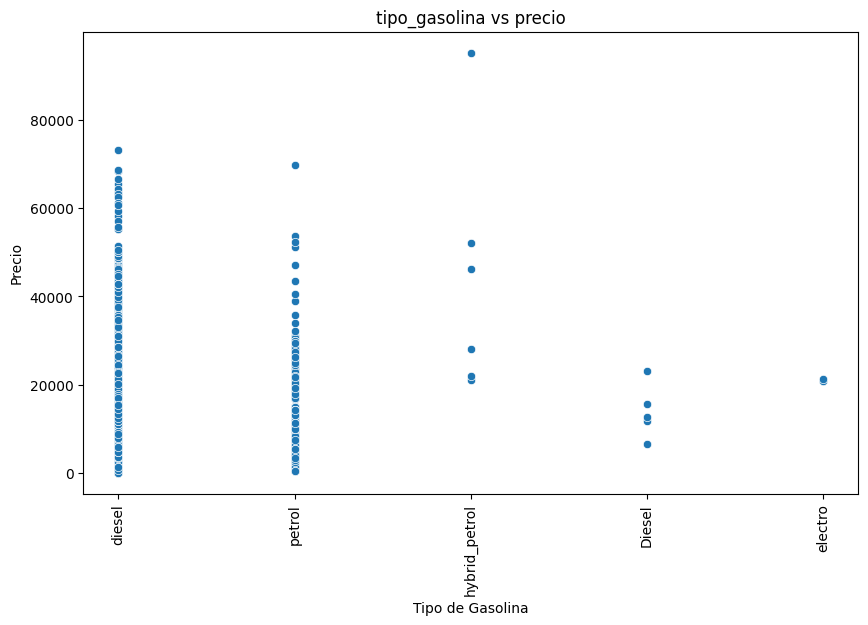

In [73]:
# tipo_gasolina vs precio
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size for better visualization
sns.scatterplot(x='tipo_gasolina', y='precio', data=df)
plt.title('tipo_gasolina vs precio')
plt.xticks(rotation=90)
plt.xlabel('Tipo de Gasolina')
plt.ylabel('Precio')
plt.show()

La columna `tipo_gasolina` contiene dos categorías iguales con diferente capitalización (`diesel` y `Diesel`). Dado que `diesel` (minúscula) es más frecuente, convertiremos todas las categorías a minúsculas.

In [74]:
df['tipo_gasolina'] = df['tipo_gasolina'].str.lower()

##### Realizamos de nuevo el `scatterplot` despues de haber aplicado la transformacion.

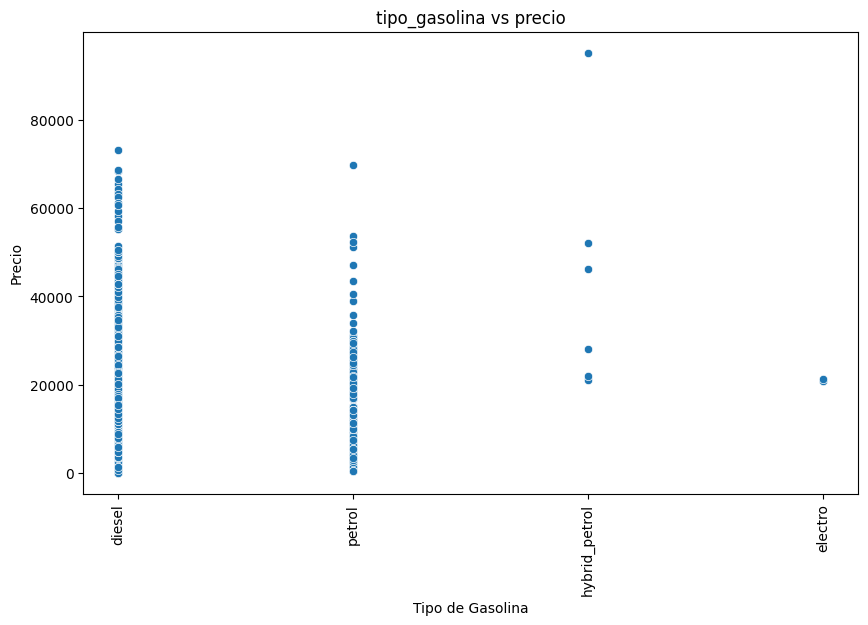

In [75]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='tipo_gasolina', y='precio', data=df)
plt.title('tipo_gasolina vs precio')
plt.xticks(rotation=90)
plt.xlabel('Tipo de Gasolina')
plt.ylabel('Precio')
plt.show()

### Color vs precio

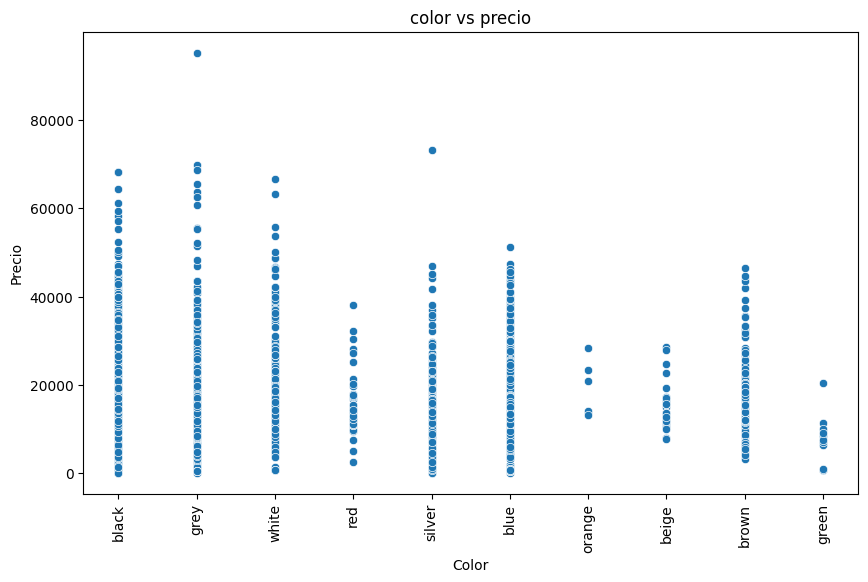

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='color', y='precio', data=df)
plt.title('color vs precio')
plt.xticks(rotation=90)
plt.xlabel('Color')
plt.ylabel('Precio')
plt.show()

### Tipo de coche vs precio

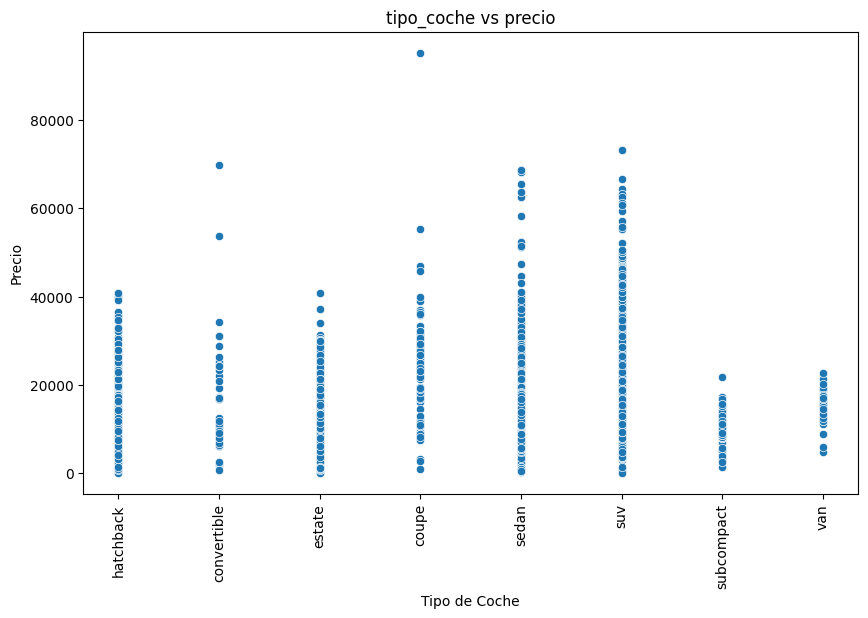

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tipo_coche', y='precio', data=df)
plt.title('tipo_coche vs precio')
plt.xticks(rotation=90)
plt.xlabel('Tipo de Coche')
plt.ylabel('Precio')
plt.show()

##### Aqui creemos que tenemos un `outlier`, asi que vamos a ver que es ese registro

In [78]:
df[(df['tipo_coche'] == 'coupe') & (df['precio'] > 80000)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo
86,i8,12402.0,170.0,hybrid_petrol,grey,coupe,True,True,False,False,False,False,True,95200.0,2008


`No es un outlier`, ya que este coche es de alta gama y lo hemos visto anteriormente cuando hemos hecho el `scatterplot`  de *`modelo vs precio (Grupo 1)`*

### Columnas booleanas vs target
Realizaremos dos gráficos, un `violinplot` y un `scatterplot`, para analizar la distribución de los valores booleanos.
Ambos gráficos se mostrarán juntos y de manera horizontal para facilitar la comparación y mejorar la visualización.

In [79]:
columnas_booleanas = ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad']

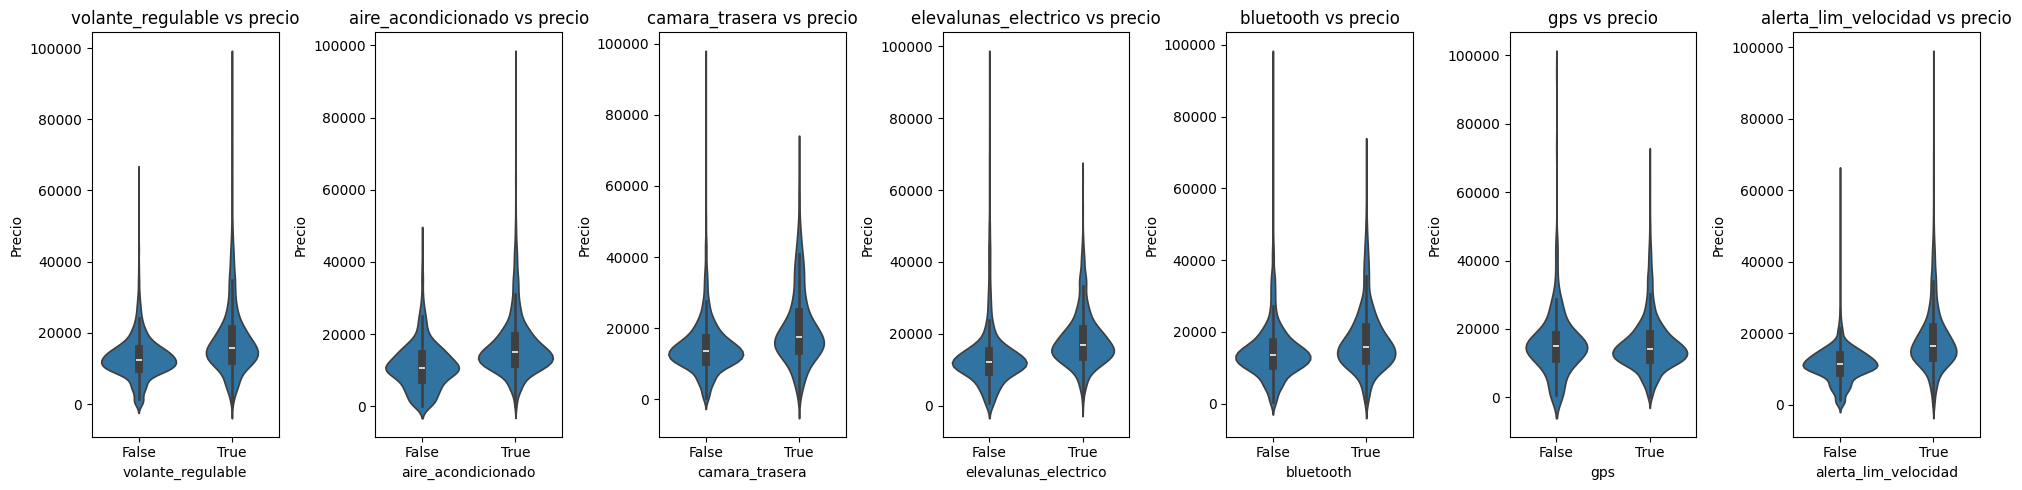

In [80]:
# Configurar una cuadrícula para los gráficos
n_cols = 7  # Número de gráficos por fila
n_rows = int(np.ceil(len(columnas_booleanas) / n_cols))  # Calcular el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Ajustar el tamaño de la cuadrícula
axes = axes.flatten()  # Aplanar el arreglo de ejes para iterar fácilmente

# Iterar sobre las columnas y crear un violin plot para cada una
for i, var in enumerate(columnas_booleanas):
    sns.violinplot(x=var, y='precio', data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs precio')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Precio')

# Apagar los ejes no utilizados
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

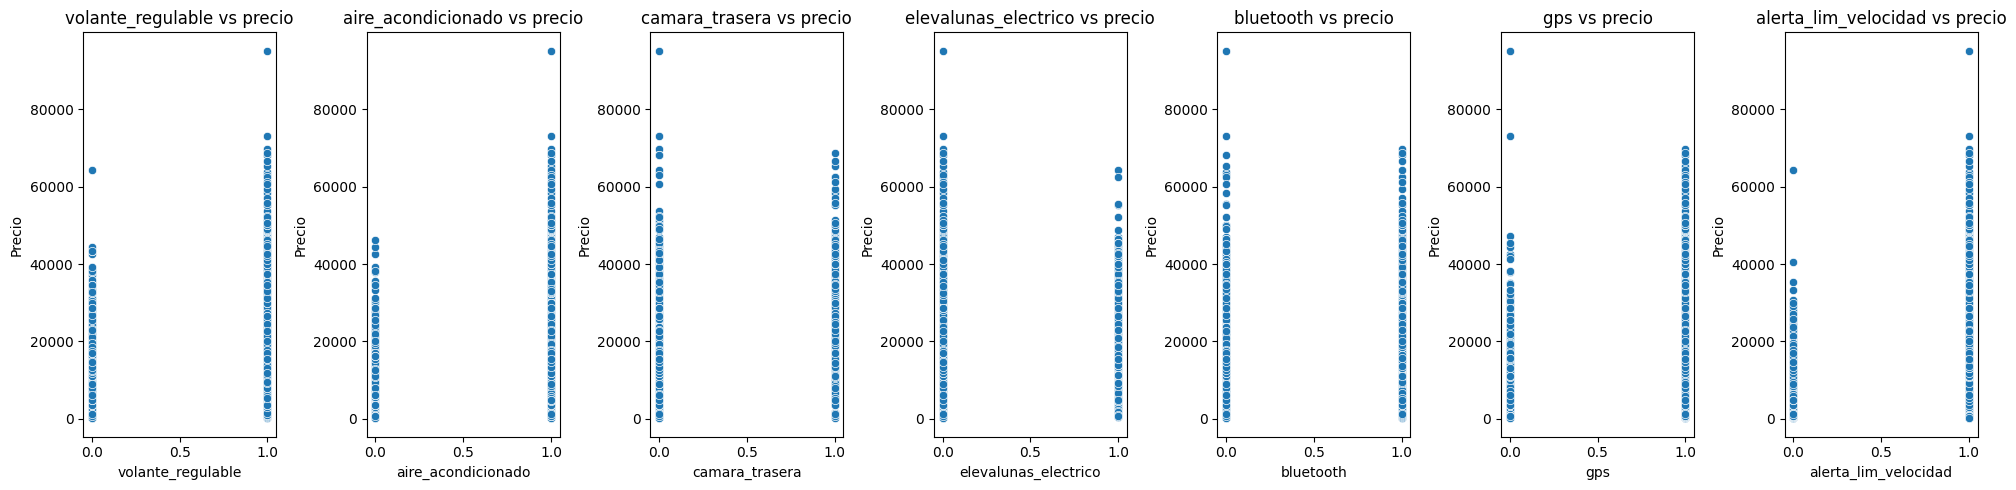

In [81]:
n_rows = int(np.ceil(len(columnas_booleanas) / n_cols))  # Calcular el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Ajustar el tamaño de la cuadrícula
axes = axes.flatten()  # Aplanar el arreglo de ejes para iterar fácilmente

# Iterar sobre las columnas y crear un scatter plot para cada una
for i, var in enumerate(columnas_booleanas):
    sns.scatterplot(x=var, y='precio', data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs precio')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Precio')

# Apagar los ejes no utilizados
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Transformación de categóricas a numéricas.

##### Creamos una checkpoint del dataFrame con el que hemos estado trabajando

In [82]:
df_transformado = df.copy()

##### Nos hacemos un array con las columnas booleanas para convertirlas de True/False a 1/0

In [83]:
bool_vars = ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad']

df_transformado[bool_vars] = df_transformado[bool_vars].astype(int)

##### Nos hacemos otro array con aquellas columnas / variables categoricas para asi aplicarles "One-Hot Encoding"

In [84]:
variables_categoricas = ['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

##### Con el metodo de pandas "get_dummies()" aplicamos one-hot encoding

In [85]:
df_transformado = pd.get_dummies(df_transformado, columns=variables_categoricas)

##### Después del one-hot encoding y las conversiones iniciales verificamos si aún existen columnas booleanas y las convertimos a enteros

In [86]:
bool_cols_after = df_transformado.select_dtypes(include='bool').columns
df_transformado[bool_cols_after] = df_transformado[bool_cols_after].astype(int)

In [87]:
# # Calcular la matriz de correlación
# corr = df_transformado.corr()

# # Crear el heatmap con anotaciones y un esquema de colores
# plt.figure(figsize=(109,109))
# sns.heatmap(corr, annot=True, cmap='coolwarm')

# plt.title("Mapa de calor de correlaciones")
# plt.show()


In [88]:
df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4806 entries, 0 to 4807
Columns: 108 entries, km to tipo_coche_van
dtypes: float64(3), int16(1), int64(104)
memory usage: 4.0 MB


In [89]:
df_transformado.dtypes

km                       float64
potencia                 float64
volante_regulable          int64
aire_acondicionado         int64
camara_trasera             int64
                          ...   
tipo_coche_hatchback       int64
tipo_coche_sedan           int64
tipo_coche_subcompact      int64
tipo_coche_suv             int64
tipo_coche_van             int64
Length: 108, dtype: object

In [90]:
df_transformado.describe()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
count,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,...,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000
mean,140737.361593,128.904494,0.550354,0.815855,0.201207,0.460882,0.356638,0.932584,0.611943,15753.162713,...,0.060341,0.099875,0.007907,0.019559,0.374948,0.155639,0.198294,0.016022,0.219725,0.007907
std,58896.958508,38.460735,0.497510,0.387643,0.400944,0.498519,0.479056,0.250767,0.487358,8635.512513,...,0.238143,0.299865,0.088577,0.138493,0.484160,0.362550,0.398756,0.125572,0.414104,0.088577
min,13.815887,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102740.750000,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10825.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140821.500000,120.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14200.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,175206.250000,135.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,18600.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,484615.000000,317.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,95200.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
numerical_cols = df_transformado.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('precio')

In [92]:
print(numerical_cols)

Index(['km', 'potencia', 'volante_regulable', 'aire_acondicionado',
       'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'gps',
       'alerta_lim_velocidad', 'modelo_ Active Tourer',
       ...
       'color_silver', 'color_white', 'tipo_coche_convertible',
       'tipo_coche_coupe', 'tipo_coche_estate', 'tipo_coche_hatchback',
       'tipo_coche_sedan', 'tipo_coche_subcompact', 'tipo_coche_suv',
       'tipo_coche_van'],
      dtype='object', length=106)
